In [29]:
!pip install -q numpy pandas matplotlib scikit-learn


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


In [31]:
iris = datasets.load_iris()
X = iris.data          # features (150 x 4)
y = iris.target        # labels (0,1,2)
feature_names = iris.feature_names
target_names = iris.target_names

# Quick checks
print("Feature names:", feature_names)
print("Target names:", target_names)
print("Shape X:", X.shape, "Shape y:", y.shape)
pd.DataFrame(X, columns=feature_names).head()


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape X: (150, 4) Shape y: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
plot_colors = "ryb"  # one letter for each class color
cmap_light = ListedColormap(['#FFAAAA', '#FFFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#FFD700', '#0000FF'])
plot_step = 0.02     # grid resolution for decision boundary plots


In [33]:
pairs = list(combinations(range(X.shape[1]), 2))  # 6 pairs of features from 4 features
print("Feature index pairs:", pairs)


Feature index pairs: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


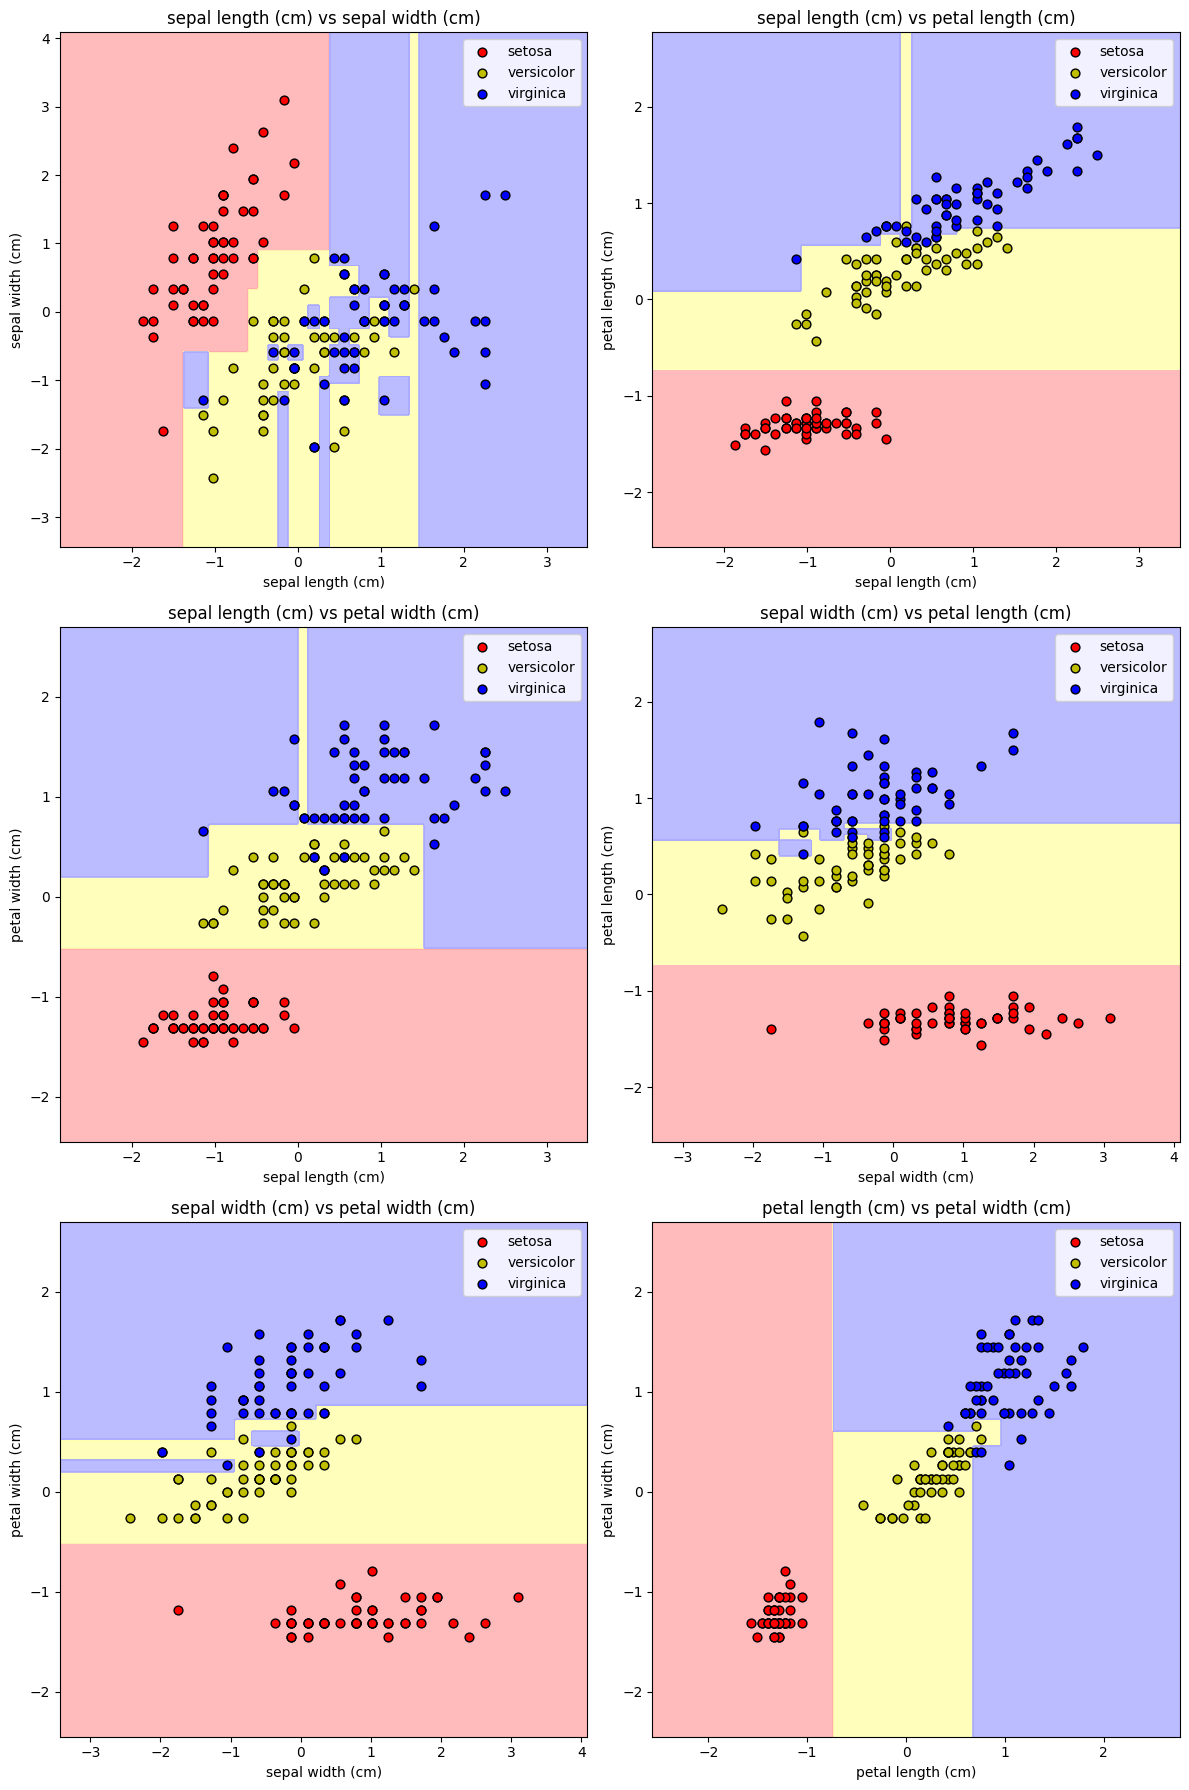

In [34]:
n_pairs = len(pairs)
ncols = 2
nrows = int(np.ceil(n_pairs / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))
axes = axes.ravel()

for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]
    X_pair = X[:, [i, j]]

    # scale (optional but helps uniform grid spacing)
    scaler = StandardScaler()
    X_pair_scaled = scaler.fit_transform(X_pair)

    # Train decision tree on the pair
    clf_pair = DecisionTreeClassifier(random_state=42)
    clf_pair.fit(X_pair_scaled, y)

    # Create meshgrid for plotting decision boundary
    x_min, x_max = X_pair_scaled[:,0].min() - 1.0, X_pair_scaled[:,0].max() + 1.0
    y_min, y_max = X_pair_scaled[:,1].min() - 1.0, X_pair_scaled[:,1].max() + 1.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf_pair.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot decision regions and data points
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    for class_idx, color in enumerate(plot_colors):
      idxs = np.where(y == class_idx)
      ax.scatter(X_pair_scaled[idxs,0], X_pair_scaled[idxs,1],
      c=color, label=target_names[class_idx], edgecolor='k', s=40)
      ax.set_xlabel(feature_names[i])
      ax.set_ylabel(feature_names[j])
      ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
      ax.legend(loc='upper right')

      # hide any empty subplots
for k in range(n_pairs, nrows * ncols):
  fig.delaxes(axes[k])
plt.tight_layout()
plt.show()


In [35]:
clf_all = DecisionTreeClassifier(random_state=42)  # you can add max_depth=... to simplify tree
clf_all.fit(X, y)


DecisionTreeClassifier(random_state=42)

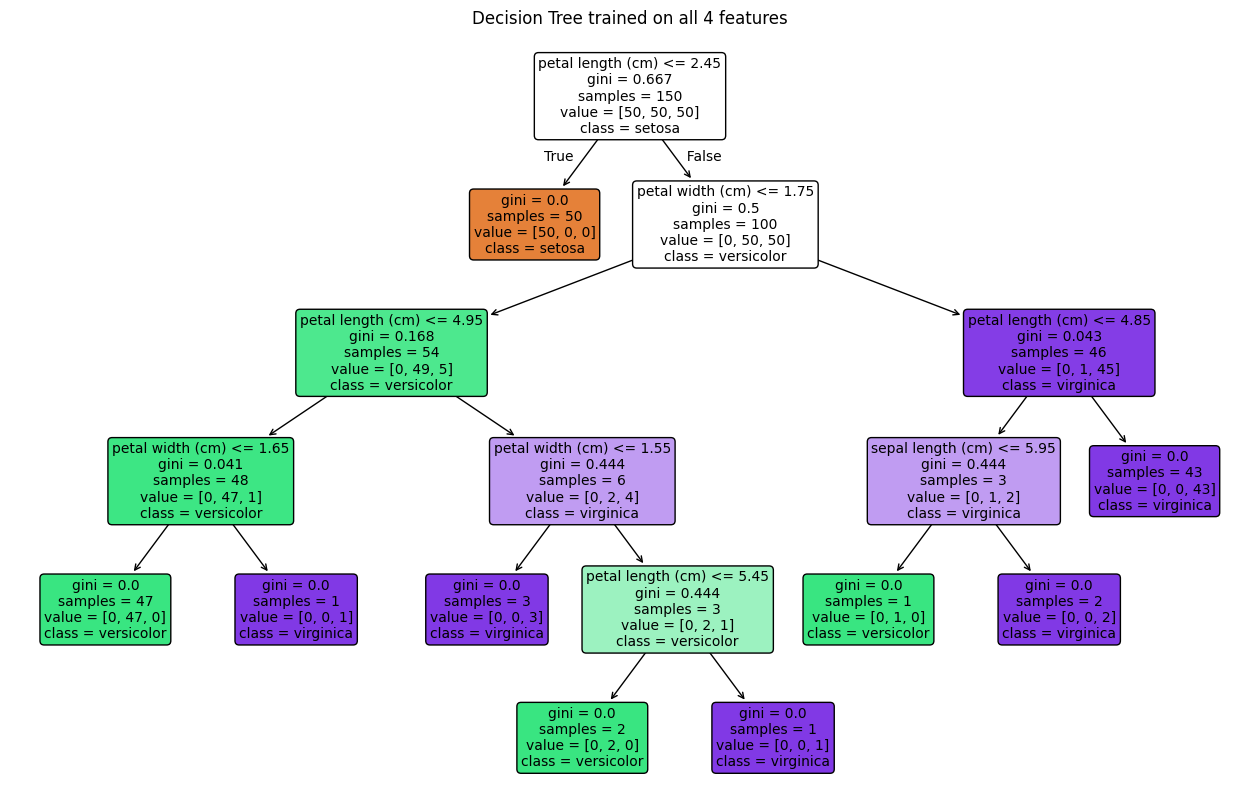

In [36]:
plt.figure(figsize=(16,10))
plot_tree(clf_all, feature_names=feature_names, class_names=target_names,
filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree trained on all 4 features")
plt.show()


In [37]:
importances = clf_all.feature_importances_
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for depth in [1, 2, 3, None]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\nmax_depth={depth} -> Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=target_names))



max_depth=1 -> Accuracy: 0.6667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.50      1.00      0.67        10
   virginica       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.50      0.67      0.56        30


max_depth=2 -> Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


max_depth=3 -> Accuracy: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
# Example: save the tree figure instead of show()
plt.figure(figsize=(16,10))
plot_tree(clf_all, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree trained on all 4 features")
plt.savefig("decision_tree_iris.png", dpi=200, bbox_inches='tight')
plt.close()
